## Análisis del Desempleo del Primer Trimestre 2020:

### 1. Obtención de los Datos:
    - Abrir y Explorar los Datos de la Población Ocupada por Actividad Económica
---
    
### 2. Exploración y Análisis de Datos:

In [1]:
# Importando Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrimos archivos de datos csv
df = pd.read_csv('../Datos/Poblacion_Ocupada_Actividad_Economica.csv', encoding = "ISO-8859-1", engine='python')
df

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
0,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",4284
1,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,179
2,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,16803
3,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10503
4,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,10323
...,...,...,...,...,...,...
183489,20200301,Nacional,Mujer,NO ESPECIFICADO,"Servicios Profesionales, Financieros y Corpora...",2594
183490,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Sociales,1517
183491,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Diversos,1742
183492,20200301,Nacional,Mujer,NO ESPECIFICADO,Gobierno y Organismos Internacionales,1242


In [3]:
# Ver las dimensiones del Dataframe
df.shape

(183494, 6)

In [4]:
# Los tipos de datos que contiene
df.dtypes

Periodo                 int64
Entidad_Federativa     object
Sexo                   object
Grupo_edad             object
Actividad_economica    object
Numero_personas         int64
dtype: object

In [5]:
# Validaciones (Es null)
df.isna()

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
183489,False,False,False,False,False,False
183490,False,False,False,False,False,False
183491,False,False,False,False,False,False
183492,False,False,False,False,False,False


In [6]:
#Después, podemos contar cuántos 'NaNs' existen usando la agregación 'sum', que suma '1' por cada 'True' y '0' por cada 'False:

In [7]:
df.isna().sum(axis=0)
df.isna().sum()

Periodo                0
Entidad_Federativa     0
Sexo                   0
Grupo_edad             0
Actividad_economica    0
Numero_personas        0
dtype: int64

In [8]:
df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
183489    0
183490    0
183491    0
183492    0
183493    0
Length: 183494, dtype: int64

In [9]:
df.dtypes

Periodo                 int64
Entidad_Federativa     object
Sexo                   object
Grupo_edad             object
Actividad_economica    object
Numero_personas         int64
dtype: object

In [10]:
# Tomo el mismo periodo pero del año pasado
df_2019 = df[df['Periodo'] == 20190301]
df_2019.head()
df_2020 = df[df['Periodo'] == 20200301]
df_2020.head()

df_periodos = df[df['Periodo'] > 20190000]
df_periodos.groupby(['Periodo']).sum().sort_values('Numero_personas', ascending = False)
# Quita los periodos restantes 2019
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20190601].index)
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20190901].index)
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20191201].index)
df_periodos.groupby(['Periodo']).sum().sort_values('Numero_personas', ascending = False)
df_periodos

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
161864,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",3752
161865,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,365
161866,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,22322
161867,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10494
161868,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,12373
...,...,...,...,...,...,...
183489,20200301,Nacional,Mujer,NO ESPECIFICADO,"Servicios Profesionales, Financieros y Corpora...",2594
183490,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Sociales,1517
183491,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Diversos,1742
183492,20200301,Nacional,Mujer,NO ESPECIFICADO,Gobierno y Organismos Internacionales,1242


In [11]:
## Ordeno de forma descendente los datos y solo considero las 5 primeras entidades
df_periodos.sort_values('Numero_personas',ascending = False).head(5)
# Obtiene df Nacional
df_periodos_nacional = df_periodos[df_periodos['Entidad_Federativa'] == 'Nacional']
# Obtiene df Entidad
df_periodo_entidad = df_periodos.drop(df_periodos[df_periodos['Entidad_Federativa'] == 'Nacional'].index)
df_periodo_entidad


,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
161864,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",3752
161865,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,365
161866,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,22322
161867,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10494
161868,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,12373
...,...,...,...,...,...,...
176529,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,"Servicios Profesionales, Financieros y Corpora...",33
176530,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Servicios Sociales,580
176531,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Servicios Diversos,2985
176532,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Gobierno y Organismos Internacionales,400


### 3. Iniciando con Visualización:
    - Graficar los Periodos para ver los datos de forma General
---

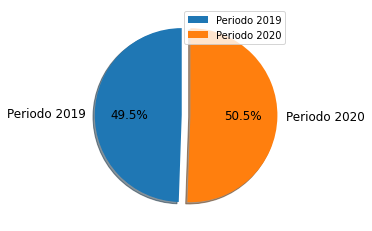

In [12]:
# Representación Gráfica de los dos Periodos
df_periodos_gr = df_periodo_entidad.groupby(['Periodo']).sum()#.sort_values('Numero_personas', ascending = False)
df_periodos_gr
x_values = df_periodo_entidad['Periodo'].unique().tolist()
x_values
y_values = df_periodos_gr['Numero_personas'].unique().tolist()
max(y_values)
len(y_values)
desfase = (0, 0.1)
plt.pie(y_values, labels=['Periodo 2019','Periodo 2020'] ,shadow=True ,explode=desfase ,autopct='%1.1f%%', startangle=90,
       labeldistance=1.1, textprops={'fontsize': 12}) #, wedgeprops = {'linewidth': 6}
plt.legend()
plt.show()
plt.savefig('Periodos.jpg')
plt.close('all')

    - Variación de la Población Ocupada por Entidad 
---

In [94]:
# Análisis de Datos General Número de Personas por Periodo-Entidades
df_periodos_gr = df_periodo_entidad.groupby(['Entidad_Federativa','Periodo']).sum().sort_values(['Numero_personas'], ascending = False)
df_periodos_gr
# Número de Personas ocupadas por Entidad y Periodo
df_periodos_gr = df_periodos_gr.unstack()
df_periodos_gr

Numero_personas         
Periodo                    20190301 20200301
Entidad_Federativa                          
Aguascalientes               562439   583762
Baja California             1684852  1687966
Baja California Sur          415868   434348
Campeche                     414441   435961
Chiapas                     1928575  2068483
Chihuahua                   1644579  1717680
Ciudad de México            4246706  4207307
Coahuila                    1313037  1318686
Colima                       377518   384955
Durango                      768576   764521
Estado de México            7558731  7689225
Guanajuato                  2488257  2525501
Guerrero                    1473675  1537120
Hidalgo                     1280819  1288481
Jalisco                     3757440  3778375
Michoacán                   2034881  2074927
Morelos                      853043   873059
Nayarit                      608394   618344
Nuevo León                  2418796  2514056
Oaxaca                      1739316  1766690
Puebla                      2812844  2847348
Queretaro                    846631   893666
Quintana Roo                 864429   851473
San Luis Potosí             1188616  1230552
Sinaloa                     1348445  1391542
Sonora                      1394667  1430748
Tabasco                      936981  1031968
Tamaulipas                  1640978  1646601
Tlaxcala                     585757   594706
Veracruz                    3265254  3431708
Yucatán                     1073627  1086089
Zacatecas                    624094   646456

In [ ]:
df_temp = df_periodos_gr.loc[:,"Numero_personas"]
df_temp
df_restas = df_temp[20200301] - df_temp[20190301]
df_restas.sort_values()

In [77]:
#df_temp["ratio"] = df_temp[20200301] - df_temp[20190301]
df_temp_ratios = df_temp["ratio"] - 1
df_ratio = df_temp_ratios.to_frame()
df_ratio = df_ratio.assign(original=0)
df_ratio = df_ratio[["original","ratio"]]

    - Mediante un HeatMap podemos Apreciar las Entidades que tuvieron cambio entre los dos periodos
---

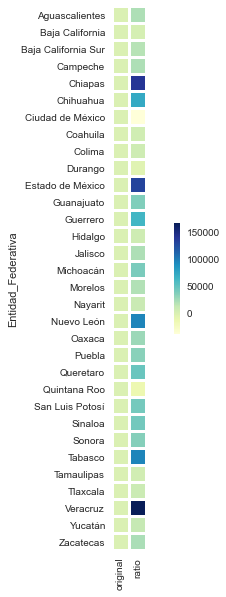

In [78]:
plt.figure(figsize = (10,10))
g = sns.heatmap(
    df_ratio, 
    square = True,
    cbar_kws = {'fraction' : 0.01},
    cmap = 'YlGnBu',
    linewidth = 2
)

In [114]:
# Se filtran las Entidades con Mayor Población Ocupada
df_periodos_edos = df_periodos[df_periodos['Entidad_Federativa'].isin(['Estado de México','Ciudad de México','Quintana Roo','Durango','Chiapas','Veracruz'])]
df_periodos_edos.sort_values(['Entidad_Federativa','Actividad_economica'])

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
162225,20190301,Chiapas,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",177185
162236,20190301,Chiapas,Hombre,25 A 44 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",266920
162248,20190301,Chiapas,Hombre,45 A 64 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",231288
162259,20190301,Chiapas,Hombre,65 AÑOS Y MAS,"Agricultura, Ganadería, Silvicultura, Caza y P...",71802
162270,20190301,Chiapas,Mujer,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",5392
...,...,...,...,...,...,...
176293,20200301,Veracruz,Hombre,65 AÑOS Y MAS,"Transportes, Comunicaciones, Correo y Almacena...",12787
176309,20200301,Veracruz,Mujer,15 A 24 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",4311
176321,20200301,Veracruz,Mujer,25 A 44 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",10426
176333,20200301,Veracruz,Mujer,45 A 64 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",1901


In [167]:
# Se filtran las Entidades con Mayor Población Ocupada
df_periodos_edos_act = df_periodos_edos[df_periodos_edos['Entidad_Federativa'].isin(['Ciudad de México','Quintana Roo','Durango','Estado de México'])]
df_periodos_edos_act_19 = df_periodos_edos_act[df_periodos_edos_act['Periodo'].isin([20190301])]
df_periodos_edos_act_19
df_periodos_edos_act_20 = df_periodos_edos_act[df_periodos_edos_act['Periodo'].isin([20200301])]
df_periodos_edos_act_20
##
df_crosstab_19 = pd.crosstab(df_periodos_edos_act_19['Entidad_Federativa'], df_periodos_edos_act_19['Actividad_economica'])
df_crosstab_19

Actividad_economica,"Agricultura, Ganadería, Silvicultura, Caza y Pesca",Comercio,Construcción,Gobierno y Organismos Internacionales,Industria Extractiva y de la Electricidad,Industria Manufacturera,No Especificado,Restaurantes y Servicios de Alojamiento,Servicios Diversos,"Servicios Profesionales, Financieros y Corporativos",Servicios Sociales,"Transportes, Comunicaciones, Correo y Almacenamiento"
Entidad_Federativa,,,,,,,,,,,,
Ciudad de México,5,8,9,8,5,9,6,8,9,9,8,8
Durango,8,8,8,9,5,9,5,8,8,9,8,8
Estado de México,8,9,8,8,4,8,4,9,8,8,8,8
Quintana Roo,8,10,9,8,5,8,5,10,9,10,9,7


In [119]:
df_crosstab_20 = pd.crosstab(df_periodos_edos_act_20['Entidad_Federativa'], df_periodos_edos_act_20['Actividad_economica'])
df_crosstab_20

Actividad_economica,"Agricultura, Ganadería, Silvicultura, Caza y Pesca",Comercio,Construcción,Gobierno y Organismos Internacionales,Industria Extractiva y de la Electricidad,Industria Manufacturera,No Especificado,Restaurantes y Servicios de Alojamiento,Servicios Diversos,"Servicios Profesionales, Financieros y Corporativos",Servicios Sociales,"Transportes, Comunicaciones, Correo y Almacenamiento"
Entidad_Federativa,,,,,,,,,,,,
Ciudad de México,6,8,7,8,5,8,7,8,8,8,8,8
Durango,9,8,7,8,6,9,6,8,8,9,10,7
Estado de México,8,8,6,8,5,8,6,8,8,8,8,8
Quintana Roo,8,10,8,8,4,8,5,10,10,10,10,9


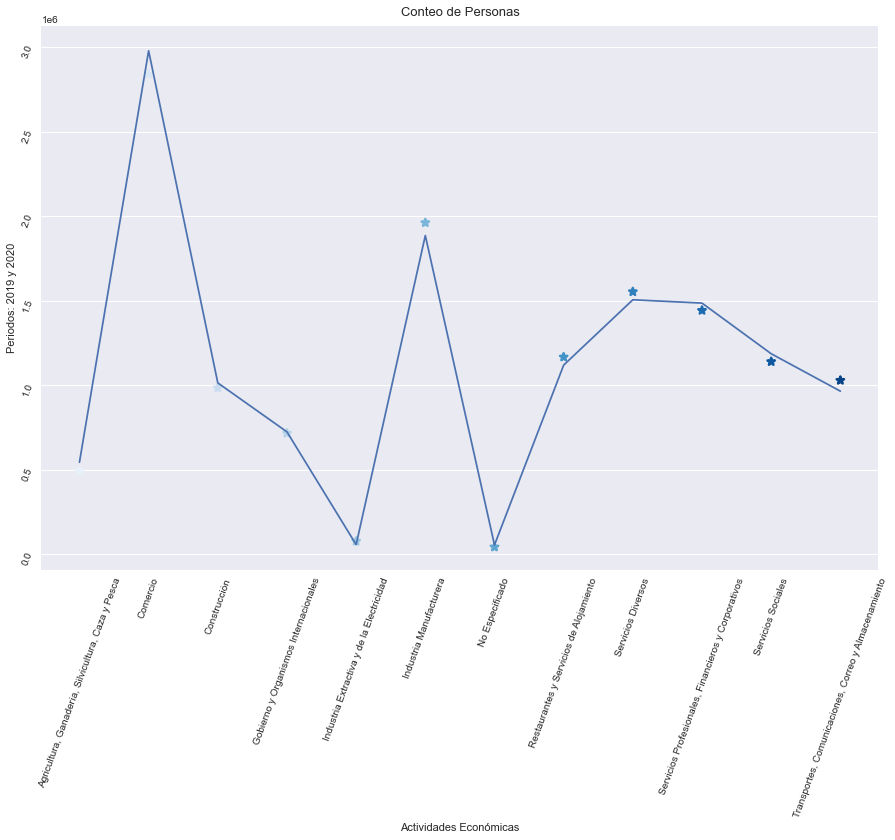

In [162]:
df_periodos_edos_act_gr = df_periodos_edos_act.groupby(['Actividad_economica','Periodo']).sum().sort_values(['Numero_personas'], ascending = False)
df_periodos_edos_act_gr

# Número de Personas ocupadas por Entidad y Periodo
df_periodos_edos_act_gr = df_periodos_edos_act_gr.unstack()
df_periodos_edos_act_gr

df_temp = df_periodos_edos_act_gr.loc[:,"Numero_personas"]
df_temp

plt.style.use('seaborn')
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.tick_params(labelrotation=70)
sns.pointplot(df_temp[20190301].index,df_temp[20190301], ax=ax, palette='Blues', markers = '*');
sns.lineplot(df_temp[20200301].index,df_temp[20200301], ax=ax, markers = '*');
ax.set_ylabel('Periodos: 2019 y 2020')
ax.set_xlabel('Actividades Económicas')
ax.set_title('Conteo de Personas', fontsize=13, pad=10);

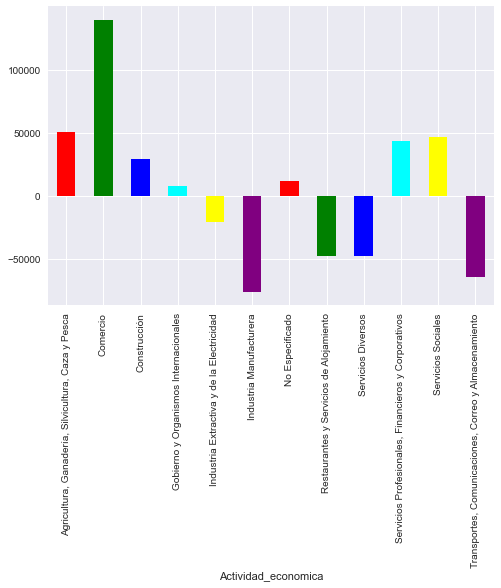

In [183]:
# Se obtienen las Actividades que tuvieron mayor variación
#df_periodos_activ = df_periodos_edos.groupby(['Periodo','Entidad_Federativa','Actividad_economica']).sum()
#df_periodos_activ
df_periodos_edos_act_gr
df_temp = df_periodos_edos_act_gr.loc[:,"Numero_personas"]
df_temp
df_restas = df_temp[20200301] - df_temp[20190301]
df_restas.sort_values()
df_restas.plot(kind="bar" ,stacked=True ,color=['red', 'green', 'blue', 'cyan','yellow','purple']);